In [1]:
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
import numba
from matplotlib.colors import LogNorm
import uproot_methods
from tqdm.auto import tqdm

from utils import set_plotting_style, get_chunking, get_chunking_dask, smaller_dtypes
import utils

import scipy.stats
import concurrent.futures
from dask.distributed import Client
import dask.dataframe as dd
import dask.array as da
from dask.distributed import progress
from dask import delayed
from yahist import Hist1D, Hist2D

In [2]:
set_plotting_style()

In [3]:
!cat ../batch/test/spin2/readme.txt

http://uaf-8.t2.ucsd.edu/~namin/dis2/?query=%2FggXToYYTo2mu2e_m18_spin2_13TeV-pythia8-JHUGen%2FRunIISummer16NanoAODv5-PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1%2FNANOAODSIM&type=files&short=short

/store/mc/RunIISummer16NanoAODv5/ggXToYYTo2mu2e_m18_spin2_13TeV-pythia8-JHUGen/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/240000/921682FD-57F5-0B4C-A4E0-90A86DE23174.root


want to see if logabsetaphi still peaks around 0 and has ~1% of the tail above 2.0


In [4]:
t = uproot.open("../batch/test/spin2//921682FD-57F5-0B4C-A4E0-90A86DE23174.root")["Events"]

In [5]:
pt = t["Muon_pt"].array()
eta = t["Muon_eta"].array()
phi = t["Muon_phi"].array()
mass = t["Muon_mass"].array()

p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(pt,eta,phi,mass)
p4 = p4[p4.counts == 2]
# Hist1D(t["Muon_pt"].array().counts,bins=np.arange(5))

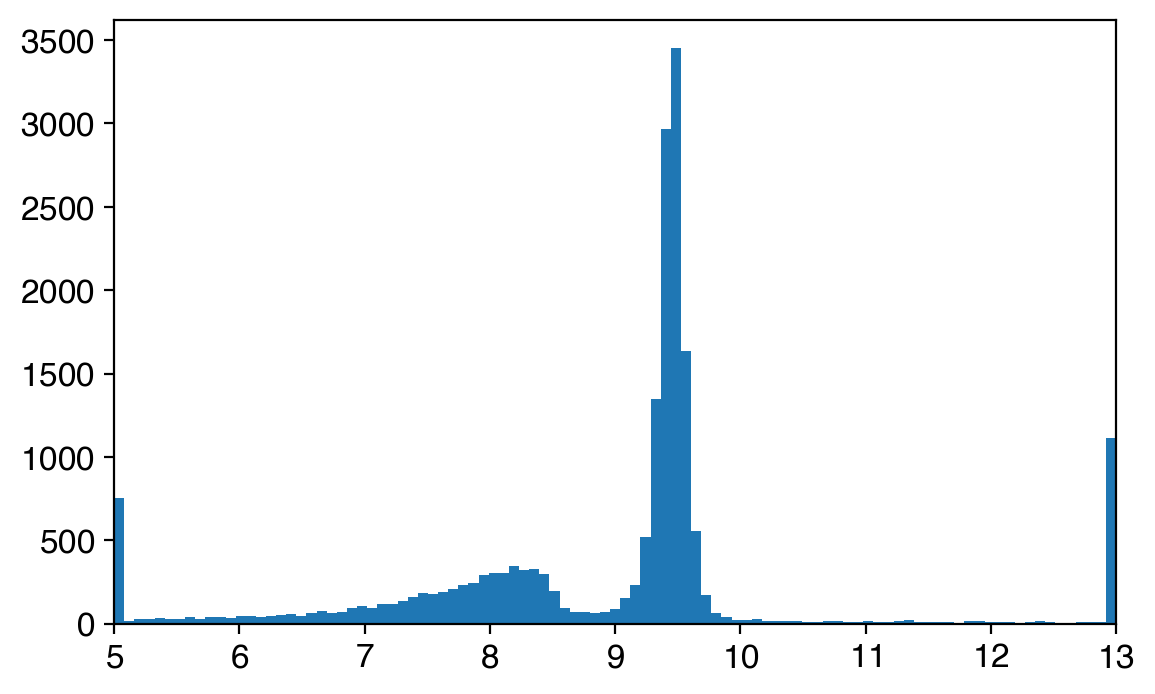

In [6]:
mass = (p4[:,0] + p4[:,1]).mass
h = Hist1D(mass, bins=np.linspace(5,13,100))
h.plot()

In [10]:
p4 = p4[(mass > 9) & (mass < 10)]

In [11]:
mu1 = p4[:,0]
mu2 = p4[:,1]
logabsetaphi = np.log10(np.abs((mu1.eta - mu2.eta) / (mu1.delta_phi(mu2))))

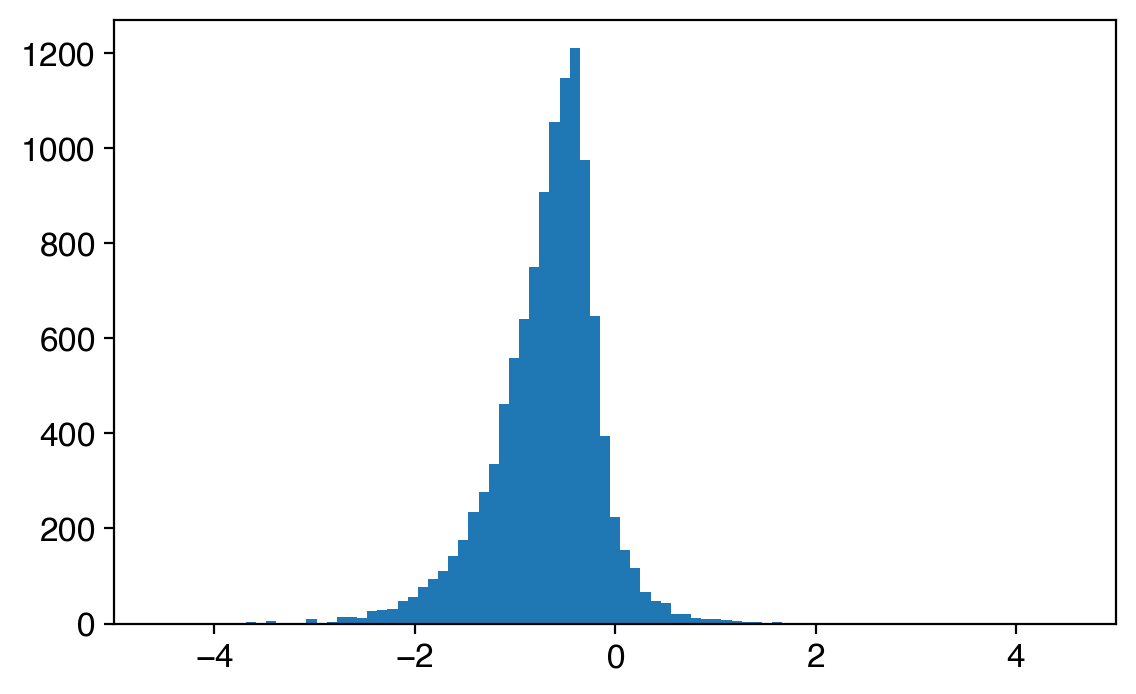

In [12]:
h = Hist1D(logabsetaphi, bins=np.linspace(-5,5,100))
h.plot()